<a href="https://colab.research.google.com/github/AbdullahAlshamrani0/IDS/blob/main/HW3/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: Abdullah Alshamrani

DATA SCIENCE

# SQL Life Expectancy: Statistical Analysis on Factors Influencing Life Expectancy



# Part 1: SQL

The project relies on accuracy of data. The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we will consider a subset of the data from year 2010-2015 from 193 countries for further analysis. The filtered file (final dataset) consists of 11 columns and 1108 rows with several predicting variables which have been divided into broad categories such as Mortality factors, Economical factors, and Social factors.


Insights
The data-set aims to answer the following key questions:


1. Delete all rows with population = 0. Perform further data cleaning for other attributes, as necessary.


2. Display total count of countries after data cleaning.


3. List of countries with the highest and lowest average mortality rates (years 2010-2015)


4. List of countries with the highest and lowest average population (years 2010-2015)



5. List of countries with the highest and lowest average GDP (years 2010-2015)



6. List of countries with the highest and lowest average Schooling  (years 2010-2015)



7. Which countries have the highest and lowest average alcohol consumption (years 2010-2015)?
Do densely populated countries tend to have lower life expectancy?

8. Do densely populated countries tend to have lower life expectancy?



Let's start step by step answering the questions above after I did the data sanatization.


1. Delete all rows with population = 0. Perform further data cleaning for other attributes, as necessary.


I finished this step by using the follwing command to delete population with 0;




In [ ]:
DELETE FROM mytable WHERE Population = '0';


Then I updated the table with null values if a certain column is equal to ' ' OR in another way = to nothing, no numerical value. for numerical value columns

In [ ]:
UPDATE mytable
SET
    Alcohol = NULLIF(Alcohol, ''),
    Percentage_Expenditure = NULLIF(Percentage_Expenditure, ''),
    Total_Expenditure = NULLIF(Total_Expenditure, ''),
    Schooling = NULLIF(Schooling, '');

Q.2 Display total count of countries after data cleaning.


In [ ]:
SELECT COUNT(DISTINCT Country) AS total
FROM mytable;

The SQL command above make us a table that has one columns, total which refers to the total number of the countries on the table and the result was 193.!


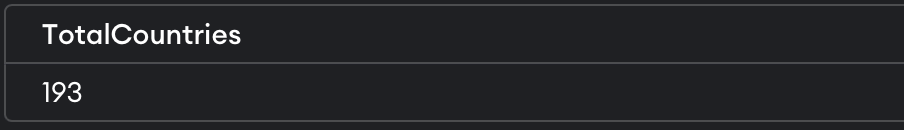

Q3. List of countries with the highest and lowest average mortality rates (years 2010-2015)

In this question and next questions I intended to make a limit of only five countries because of how big the table is (for some reason the lowest countires all of them have a value of 0? and I made sure that I deleted all value of 0 or replaced with null, I will be showing the avg rate of morality of countries '5')


In [ ]:
SELECT
    Country,
    AVG(CAST(Adult_Mortality AS DECIMAL(10, 2))) AS AverageMortalityRate
FROM
    mytable
WHERE
    Year BETWEEN 2010 AND 2015
GROUP BY
    Country
ORDER BY
    AverageMortalityRate ASC
LIMIT 5;


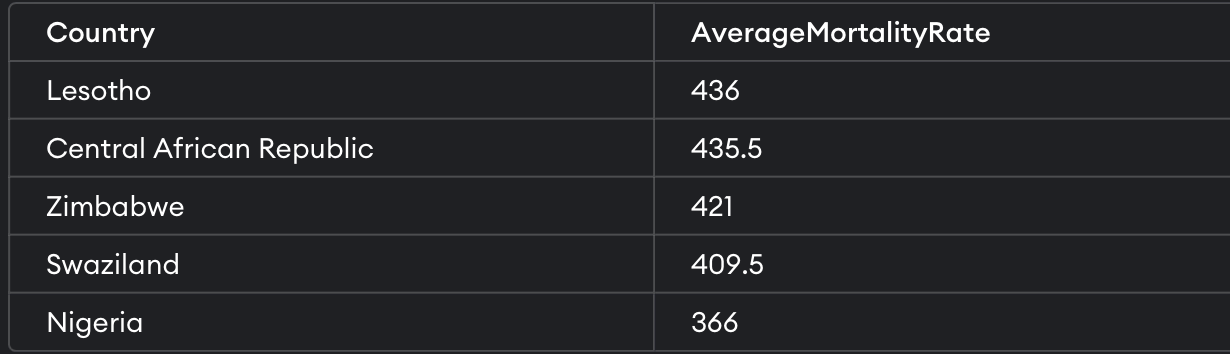

Q4. List of countries with the highest and lowest average population (years 2010-2015)


In [ ]:
-- Calculate the average populations for each country from 2010 to 2015
SELECT
    Country,
    AVG(CAST(Population AS DECIMAL(10, 2))) AS AveragePopulation
FROM
    mytable
WHERE
    Year BETWEEN 2010 AND 2015
GROUP BY
    Country
ORDER BY
    AveragePopulation ASC
LIMIT 5;

SELECT
    Country,
    AVG(CAST(Population AS DECIMAL(10, 2))) AS AveragePopulation
FROM
    mytable
WHERE
    Year BETWEEN 2010 AND 2015
GROUP BY
    Country
ORDER BY
    AveragePopulation DESC
LIMIT 5;



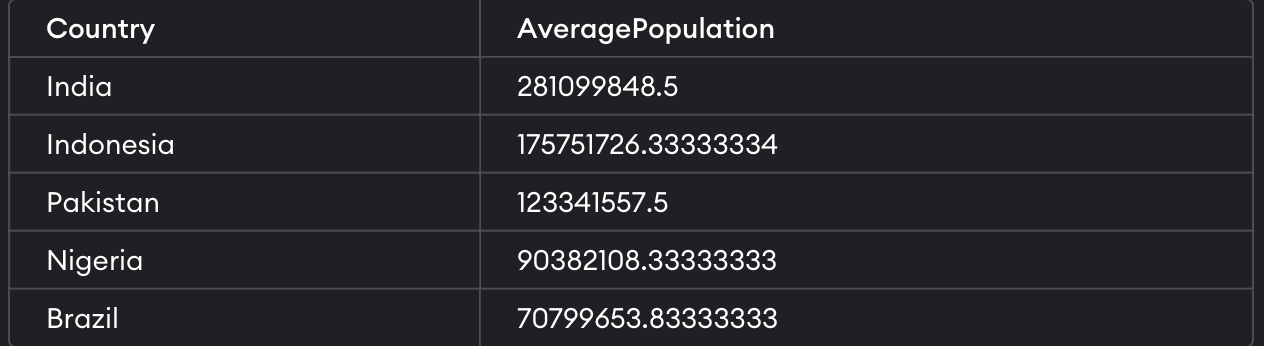

Q5. List of countries with the highest and lowest average GDP (years 2010-2015)


In [ ]:
SELECT
    Country,
    AVG(CAST(GDP AS DECIMAL(10, 2))) AS AverageGDP
FROM
    mytable
WHERE
    Year BETWEEN 2010 AND 2015
GROUP BY
    Country
ORDER BY
    AverageGDP ASC
LIMIT 5;

SELECT
    Country,
    AVG(CAST(GDP AS DECIMAL(10, 2))) AS AverageGDP
FROM
    mytable
WHERE
    Year BETWEEN 2010 AND 2015
GROUP BY
    Country
ORDER BY
    AverageGDP DESC
LIMIT 5;

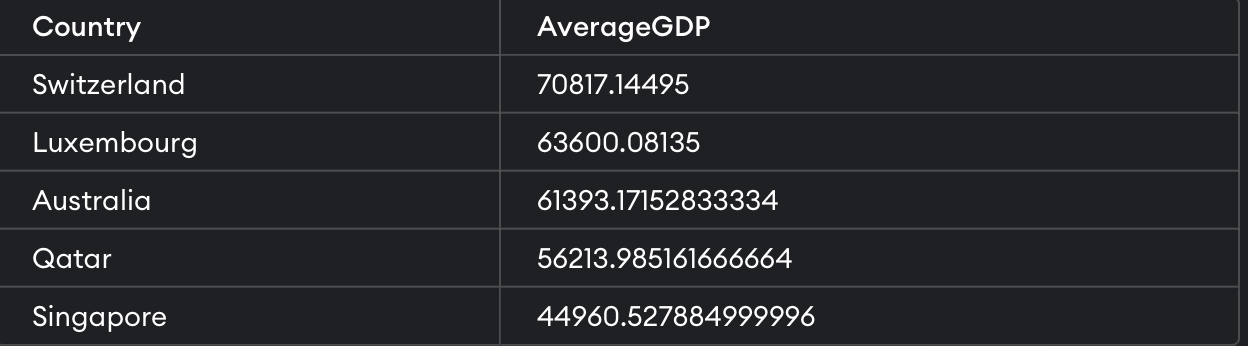

Q6. List of countries with the highest and lowest average Schooling  (years 2010-2015)


In [ ]:
SELECT
    Country,
    AVG(CAST(Schooling AS DECIMAL(10, 2))) AS AverageSchooling
FROM
    mytable
WHERE
    Year BETWEEN 2010 AND 2015
GROUP BY
    Country
ORDER BY
    AverageSchooling ASC --Low
LIMIT 5;

SELECT
    Country,
    AVG(CAST(Schooling AS DECIMAL(10, 2))) AS AverageSchooling
FROM
    mytable
WHERE
    Year BETWEEN 2010 AND 2015
GROUP BY
    Country
ORDER BY
    AverageSchooling DESC -- High
LIMIT 5;

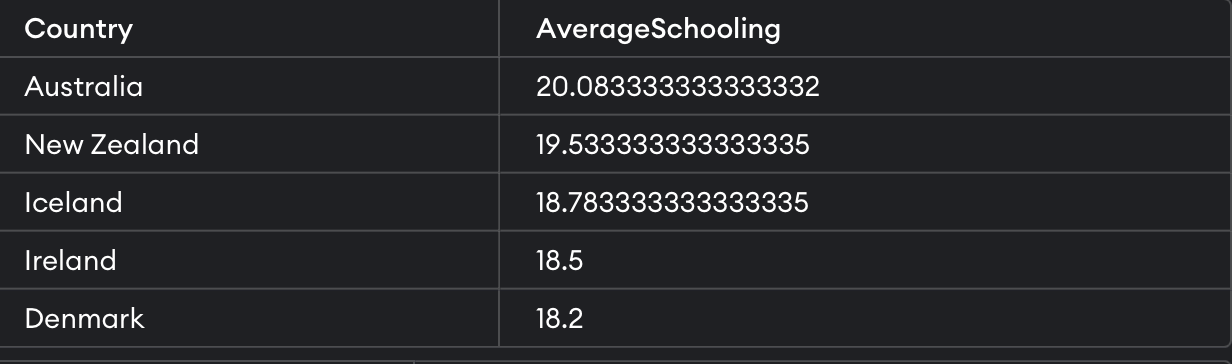

Q7. Which countries have the highest and lowest average alcohol consumption (years 2010-2015)?


In [ ]:
SELECT
    Country,
    AVG(CAST(Alcohol AS DECIMAL(10, 2))) AS AverageAlcoholConsumption
FROM
    mytable
WHERE
    Year BETWEEN 2010 AND 2015
GROUP BY
    Country
ORDER BY
    AverageAlcoholConsumption ASC
LIMIT 5;

SELECT
    Country,
    AVG(CAST(Alcohol AS DECIMAL(10, 2))) AS AverageAlcoholConsumption
FROM
    mytable
WHERE
    Year BETWEEN 2010 AND 2015
GROUP BY
    Country
ORDER BY
    AverageAlcoholConsumption DESC
LIMIT 5;

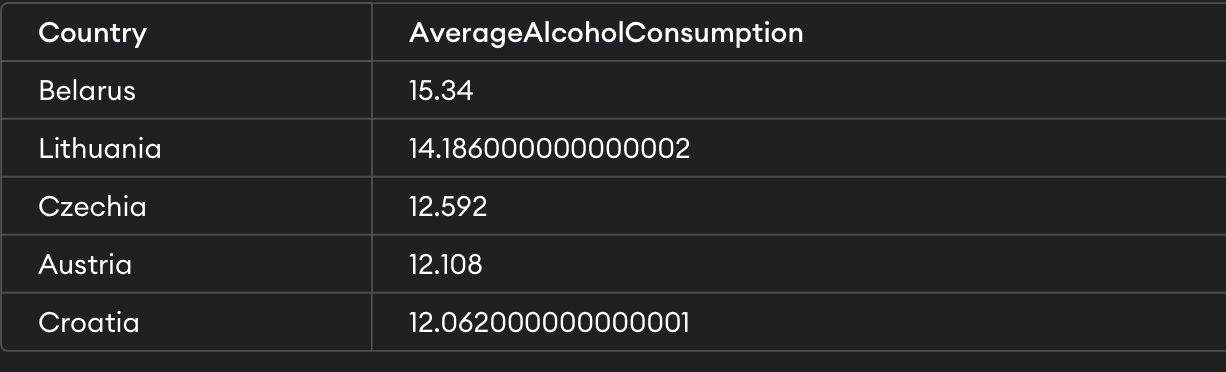

-----


# **PART 2: PYTHON**

In [49]:
# Importing neccessury libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



In [12]:
#upluding the csv file into python
from google.colab import files
uploaded = files.upload()


Saving Life_Expectancy.csv to Life_Expectancy.csv


In [29]:
# Load the data into a DataFrame
df = pd.read_csv('Life_Expectancy.csv')

# Data cleaning: Replace empty strings with NaN
df.replace('', np.nan, inplace=True)




In [21]:
print(df.columns)


Index(['Country', 'Year', 'Life_Expectancy ', 'Adult_Mortality', 'Alcohol',
       'Percentage_Expenditure', ' BMI ', 'Total_Expenditure', 'GDP',
       'Population', 'Schooling'],
      dtype='object')


In [37]:
print(df.columns)

# delete spacing on cols names
df.columns = df.columns.str.strip()

print(df.columns)

# correlation analysis
correlation = df['Life_Expectancy'].corr(df['Adult_Mortality'])
print(f"Correlation between Adult Mortality and Life Expectancy: {correlation:.2f}")


Index(['Country', 'Year', 'Life_Expectancy', 'Adult_Mortality', 'Alcohol',
       'Percentage_Expenditure', 'BMI', 'Total_Expenditure', 'GDP',
       'Population', 'Schooling'],
      dtype='object')
Index(['Country', 'Year', 'Life_Expectancy', 'Adult_Mortality', 'Alcohol',
       'Percentage_Expenditure', 'BMI', 'Total_Expenditure', 'GDP',
       'Population', 'Schooling'],
      dtype='object')
Correlation between Adult Mortality and Life Expectancy: -0.80


**Correlation between Adult Mortality and Life Expectancy: -0.80**

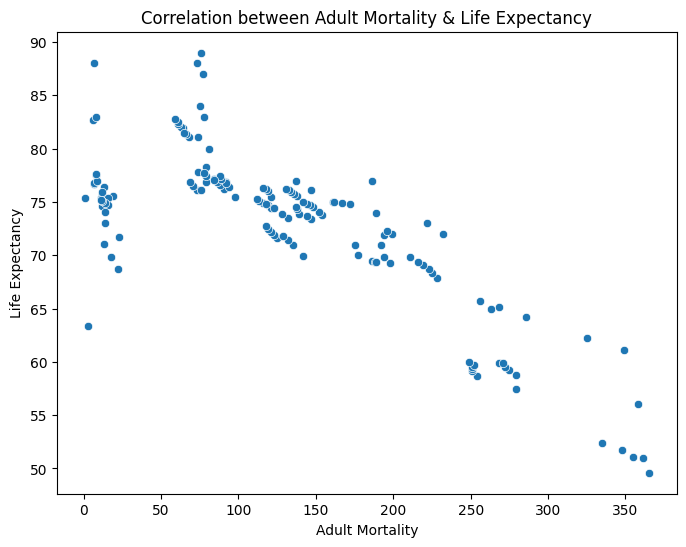

In [40]:
# Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Adult_Mortality', y='Life_Expectancy', data=df)
plt.title('Correlation between Adult Mortality & Life Expectancy')
plt.xlabel('Adult Mortality')
plt.ylabel('Life Expectancy')
plt.show()

How does Adult mortality rates affect life expectancy?


as we notice when ploting above the coefficient is close to -1. This means adult mortality increases and Life Expectance tends to decrease. + correlation coefficient is -0.85, it indicates a strong negative correlation,

----

Does life expectancy have positive or negative correlation with eating habits, drinking alcohol, social factors, and economic factors?


In [46]:
print(df.columns)

# delete spacing on cols names
df.columns = df.columns.str.strip()

print(df.columns)

correlation_eating_habits = df['Life_Expectancy'].corr(df['Percentage_Expenditure'])
correlation_alcohol = df['Life_Expectancy'].corr(df['Alcohol'])
correlation_social_factors = df['Life_Expectancy'].corr(df['Schooling'])
correlation_economic_factors = df['Life_Expectancy'].corr(df['GDP'])

#Correlations analysis
print(f"Correlation between Life Expectancy and Eating Habits: {correlation_eating_habits:.2f}")
print(f"Correlation between Life Expectancy and Alcohol: {correlation_alcohol:.2f}")
print(f"Correlation between Life Expectancy and Schooling: {correlation_social_factors:.2f}")
print(f"Correlation between Life Expectancy and GDP: {correlation_economic_factors:.2f}")


Index(['Country', 'Year', 'Life_Expectancy', 'Adult_Mortality', 'Alcohol',
       'Percentage_Expenditure', 'BMI', 'Total_Expenditure', 'GDP',
       'Population', 'Schooling'],
      dtype='object')
Index(['Country', 'Year', 'Life_Expectancy', 'Adult_Mortality', 'Alcohol',
       'Percentage_Expenditure', 'BMI', 'Total_Expenditure', 'GDP',
       'Population', 'Schooling'],
      dtype='object')
Correlation between Life Expectancy and Eating Habits: 0.43
Correlation between Life Expectancy and Alcohol: 0.36
Correlation between Life Expectancy and Schooling: 0.74
Correlation between Life Expectancy and GDP: 0.51



**Does life expectancy have positive or negative correlation with eating habits, drinking alcohol, social factors, and economic factors?**

Life Expectency and other variables (Percentage_Expenditure, Alcohol, Schooling, GDP). all have a positive correlation.


BTW: I used Percentage_Expenditure to represent Eating habits

----


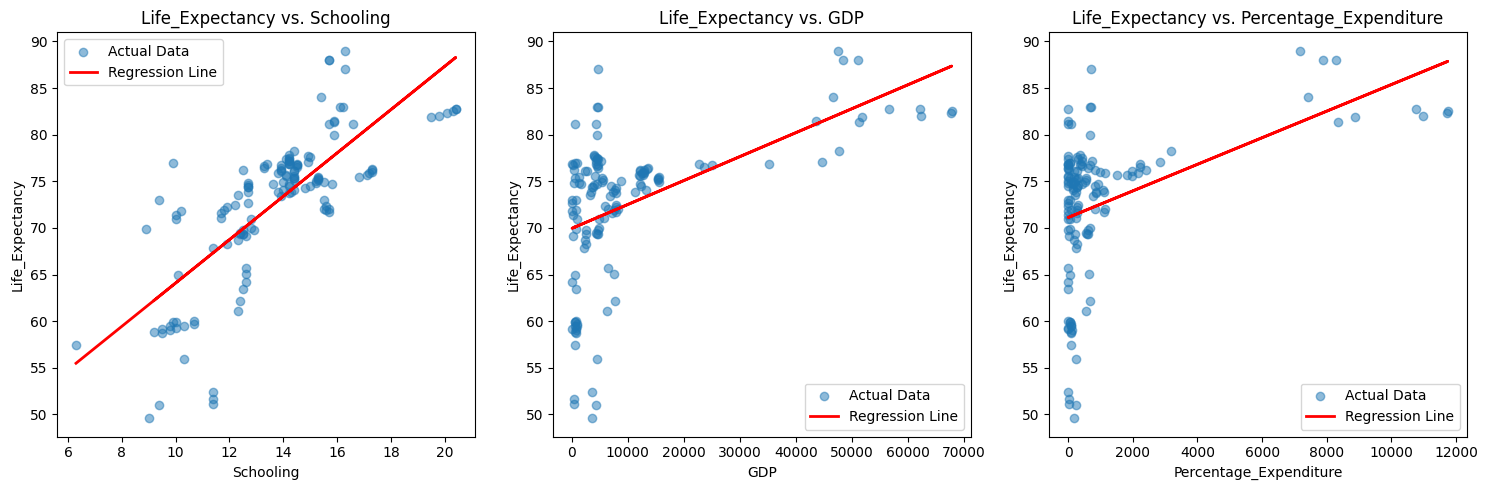

In [56]:
independent_vars = ['Schooling', 'GDP', 'Percentage_Expenditure']  # Replace with actual column names

dependent_var = 'Life_Expectancy'

#plots for regression
fig, axs = plt.subplots(1, len(independent_vars), figsize=(15, 5))

for i, var in enumerate(independent_vars):
    X = df[var].values.reshape(-1, 1)
    Y = df[dependent_var].values


    #linear regression model
    model = LinearRegression()
    model.fit(X, Y)

    # Predict values
    Y_pred = model.predict(X)

    # Plot the regression line
    axs[i].scatter(X, Y, alpha=0.5, label='Actual Data')
    axs[i].plot(X, Y_pred, color='red', linewidth=2, label='Regression Line')
    axs[i].set_title(f'{dependent_var} vs. {var}')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel(dependent_var)
    axs[i].legend()

plt.tight_layout()
plt.show()
